In [1]:
from genetic_algorithm import SGA_Sine
sga_sine = SGA_Sine(size=100, bits=15)

population, mean_fitness, best_fitness, entropy = sga_sine.run(
    generations=10,
    maximize=True,
    p_crossover=0.6,
    p_mut=0.01,
    feasible_region=(5, 10),
)

c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

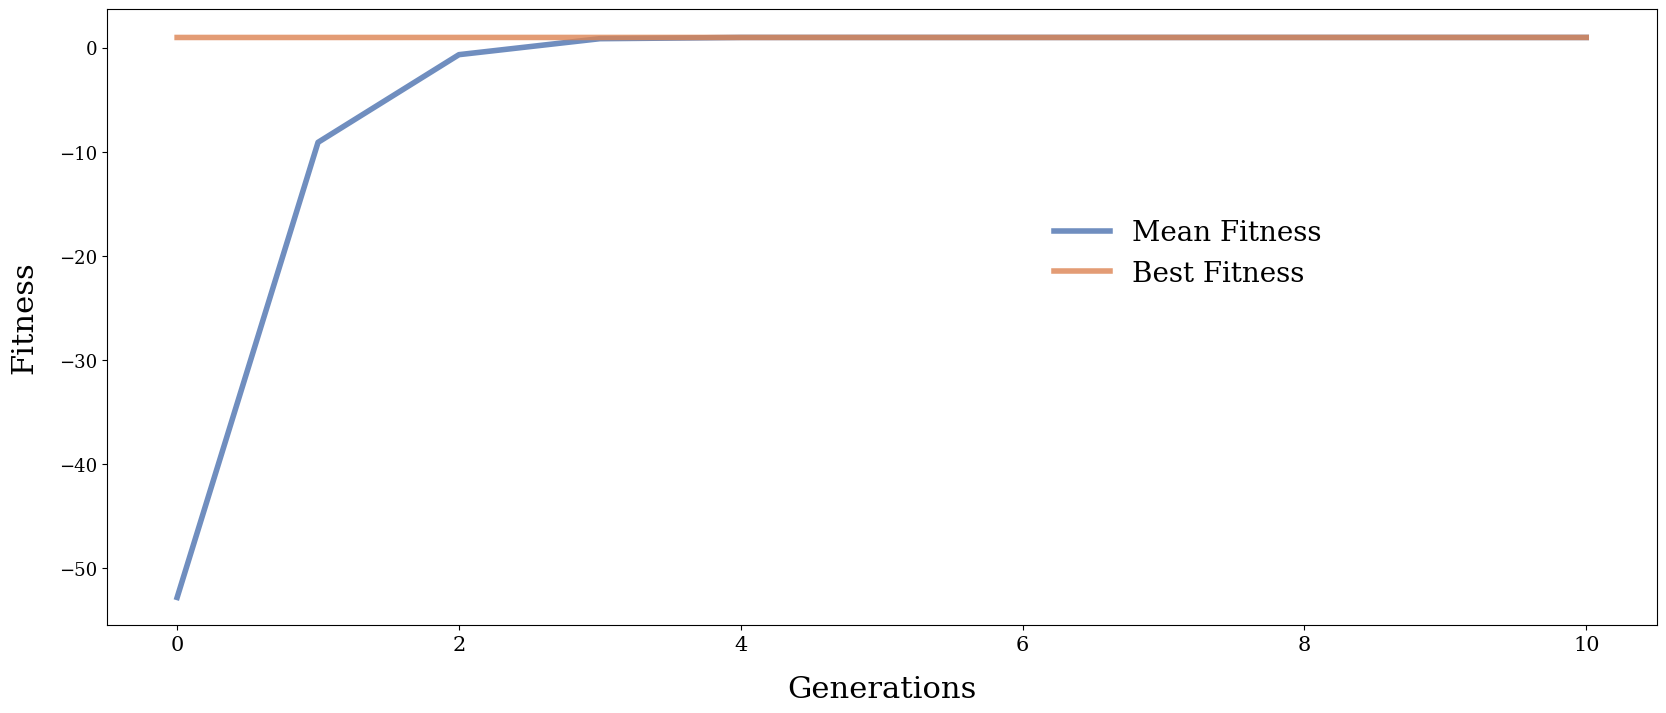

In [2]:
import numpy as np
from plots import plot_fitness

plot_fitness(mean_fitness, best_fitness)


c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


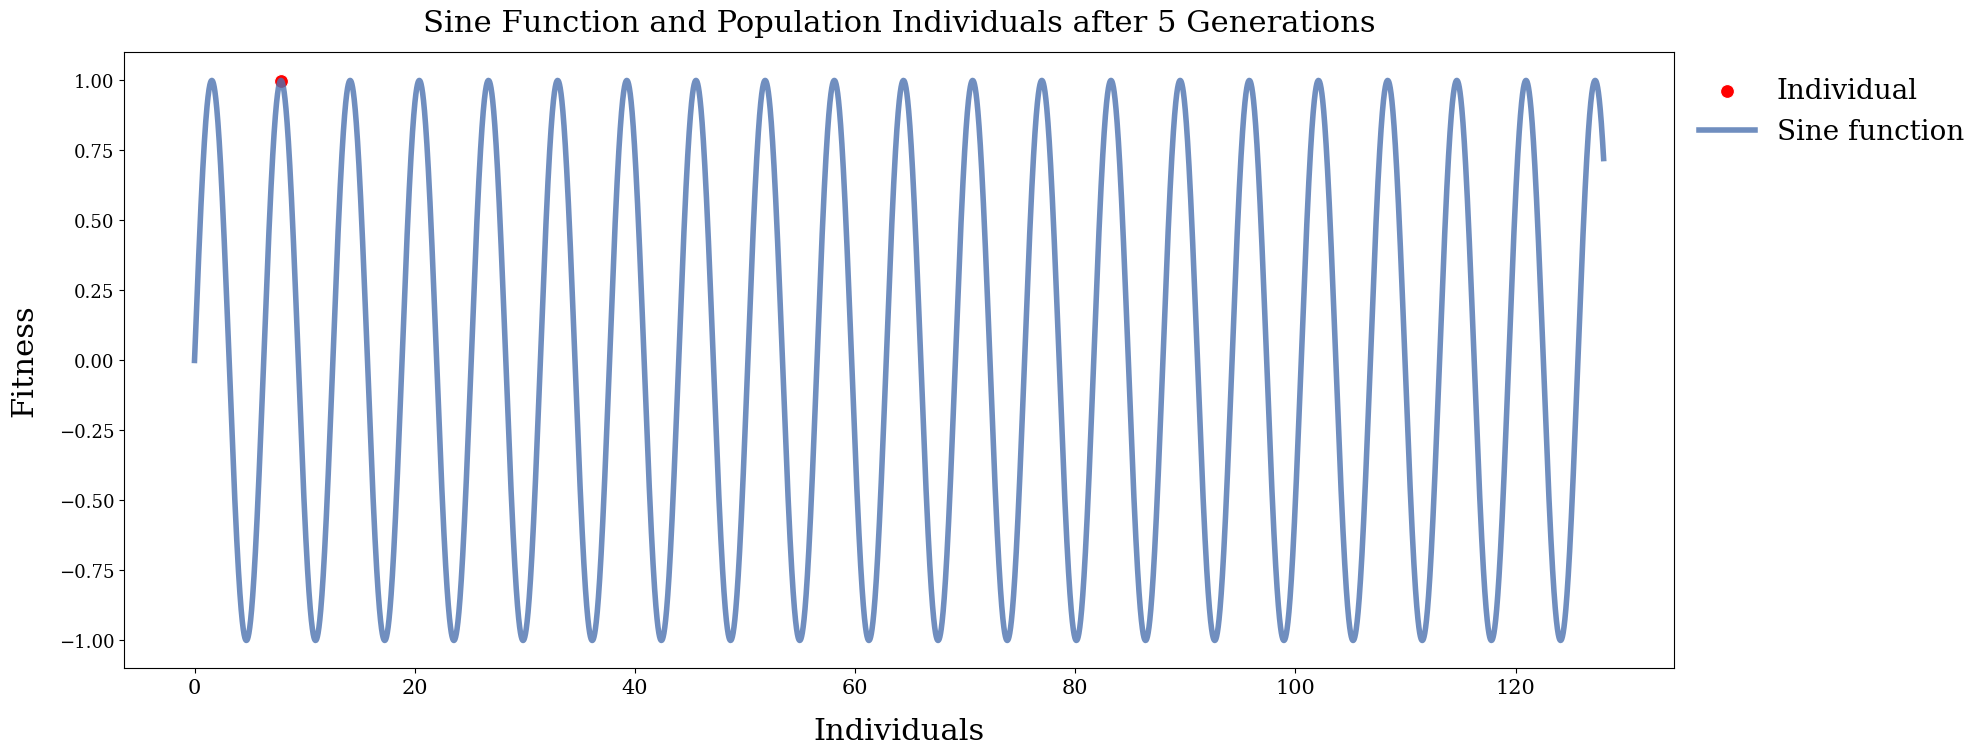

In [3]:
from plots import plot_sine
x_pop = list(map(lambda x: np.asarray(sga_sine.decode(x), dtype=float), population))


plot_sine(x_pop, generation=5)

In [4]:
from genetic_algorithm import SGA_LinReg
import pandas as pd
from LinReg import LinReg

data = pd.read_csv('dataset.txt', header=None).values
X, y = data[:, :-1], data[:, -1]
reg = LinReg(X=X, y=y)

size = 50
bits = X.shape[1]
from time import time
for size, p_crossover, p_mut in [(50, 0.3, 0.01), (100, 0.3, 0.01)]:
    sga_linreg = SGA_LinReg(size=size, bits=bits, linreg=reg)
    t = time()
    population, mean_fitness, best_fitness, entropy = sga_linreg.run(generations=200, maximize=False, p_crossover=p_crossover, p_mut=p_mut)
    print(f'Elapsed time: {time() - t:.2f} seconds')
    print(f'[size={size}, p_crossover={p_crossover}, p_mut={p_mut}, best_fitness={best_fitness[-1]:.4f}, mean_fitness={mean_fitness[-1]:.4f}')


Elapsed time: 13.98 seconds
[size=50, p_crossover=0.3, p_mut=0.01, best_fitness=0.1229, mean_fitness=0.1229
Elapsed time: 26.48 seconds
[size=100, p_crossover=0.3, p_mut=0.01, best_fitness=0.1226, mean_fitness=0.1226


Best hyperparameters: 

Elapsed time: 23.67 seconds

[size=50, p_crossover=0.3, p_mut=0.01, best_fitness=0.1231, mean_fitness=0.1233]

Elapsed time: 78.64 seconds

[size=100, p_crossover=0.3, p_mut=0.01, best_fitness=0.1229, mean_fitness=0.1230]

c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

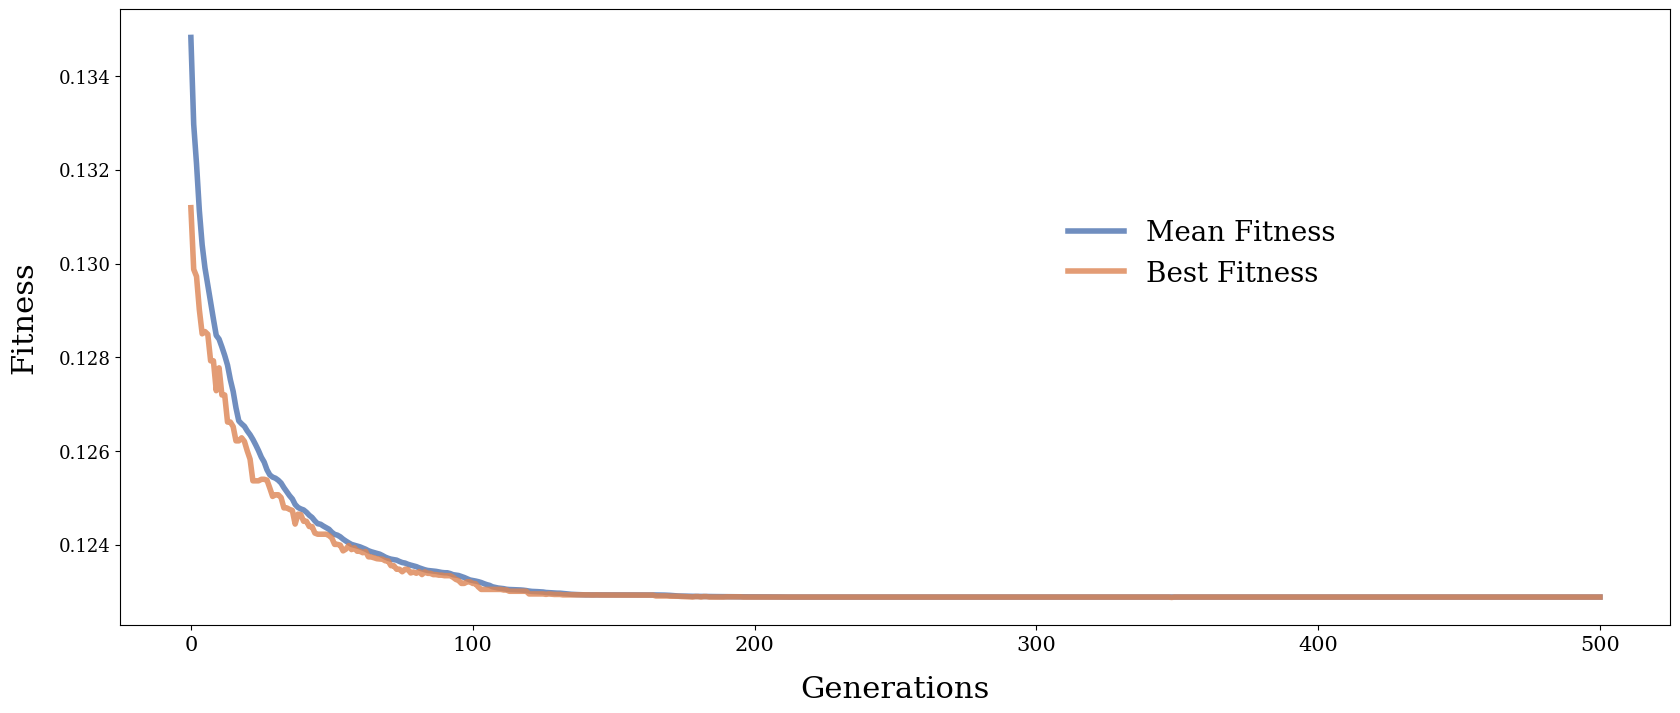

In [2]:
import numpy as np
from plots import plot_fitness

size = 50
bits = X.shape[1]
sga_linreg = SGA_LinReg(size=size, bits=bits, linreg=reg)
plain_population, plain_mean_fitness, plain_best_fitness, plain_entropy = sga_linreg.run(generations=500, maximize=False, p_crossover=0.3, p_mut=0.01)
plot_fitness(plain_mean_fitness, plain_best_fitness)

In [ ]:
fitness = np.array(list(map(lambda x: reg.get_fitness(x), population[-1])))
best_features = plain_population[-1][np.argmin(fitness)]
mean_features = np.mean(population[-1])

In [ ]:
print('Fitness of best features: ', best_fitness[-1]) 
print('Fitness of mean features: ', mean_fitness[-1])
print('Fitness of all features: ', reg.get_fitness(np.ones_like(best_features)))

Fitness of best features:  0.12257681138227906
Fitness of mean features:  0.12258749434716965
Fitness of all features:  0.1318553311725425


### With crowding:

Crowding is implemented by using a restricted tournament selection or giving a similarity penalty to the fitness function.

c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

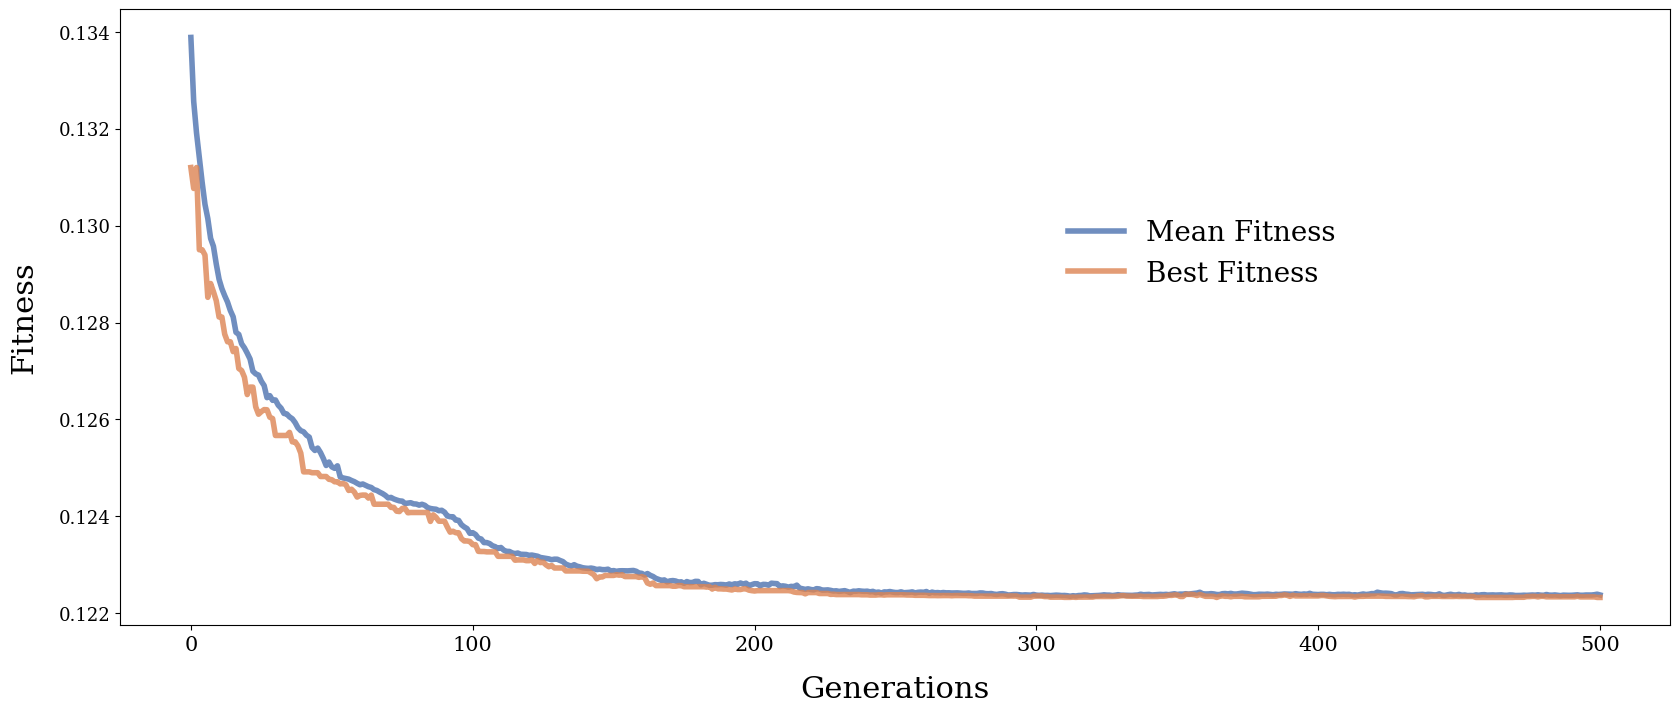

In [1]:
import numpy as np
from plots import plot_fitness

from genetic_algorithm import SGA_LinReg
import pandas as pd
from LinReg import LinReg

data = pd.read_csv('dataset.txt', header=None).values
X, y = data[:, :-1], data[:, -1]
reg = LinReg(X=X, y=y)


size = 50
bits = X.shape[1]
sga_linreg = SGA_LinReg(size=size, bits=bits, linreg=reg)
sim_crowding_population, sim_crowding_mean_fitness, sim_crowding_best_fitness, sim_crowding_entropy = sga_linreg.run(generations=500, maximize=False, p_crossover=0.3, p_mut=0.01, crowding='diversity')
plot_fitness(sim_crowding_mean_fitness, sim_crowding_best_fitness)

In [ ]:
print('Fitness of best features: ', best_fitness[-1]) 
print('Fitness of mean features: ', mean_fitness[-1])
print('Fitness of all features: ', reg.get_fitness(np.ones_like(best_features)))

Fitness of best features:  0.12257681138227906
Fitness of mean features:  0.12258749434716965
Fitness of all features:  0.1318553311725425


c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

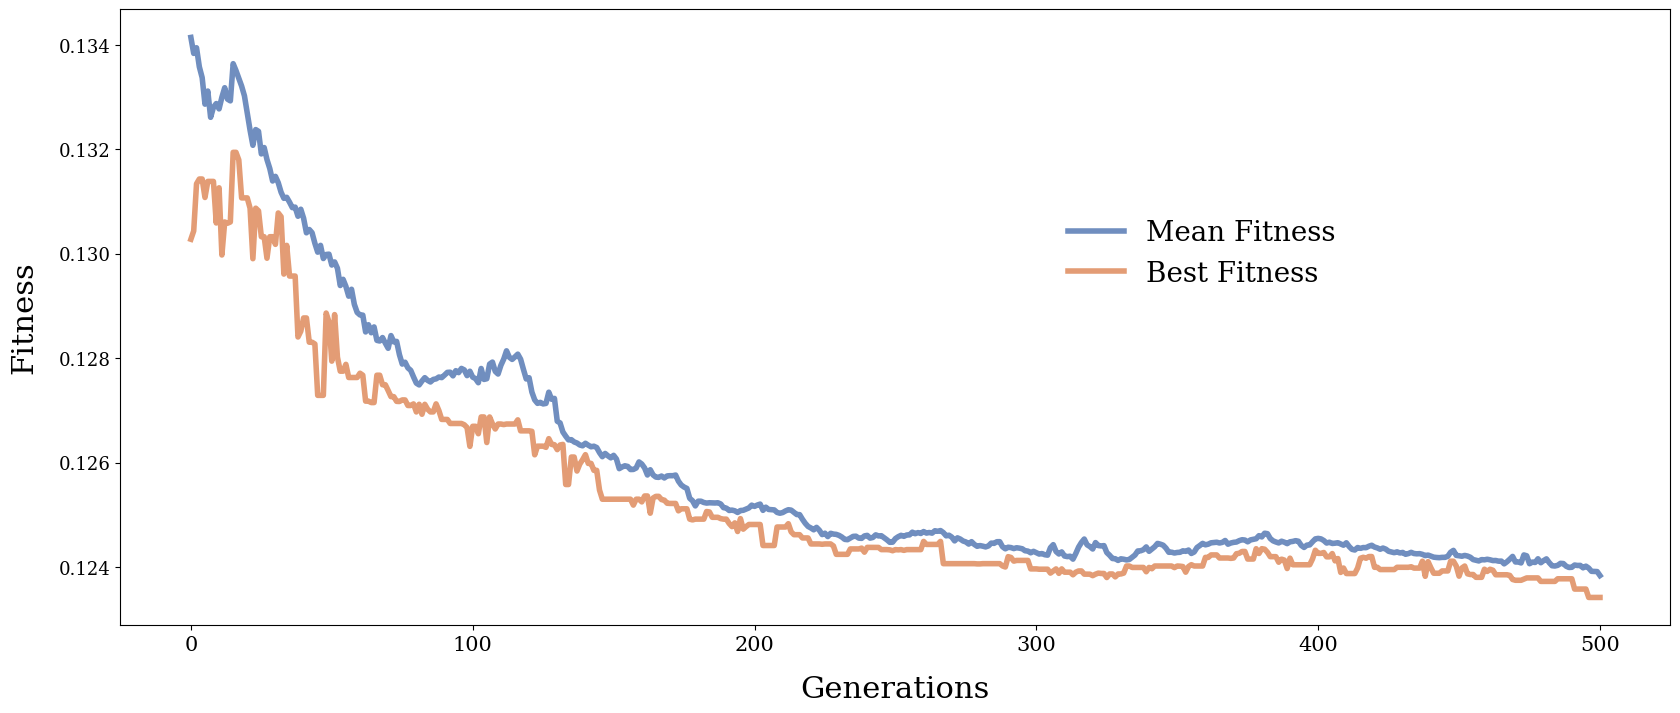

In [ ]:
import numpy as np
from plots import plot_fitness


from genetic_algorithm import SGA_LinReg
import pandas as pd
from LinReg import LinReg

data = pd.read_csv('dataset.txt', header=None).values
X, y = data[:, :-1], data[:, -1]
reg = LinReg(X=X, y=y)


size = 50
bits = X.shape[1]
sga_linreg = SGA_LinReg(size=size, bits=bits, linreg=reg)
tournament_population, tournament_mean_fitness, tournament_best_fitness, tournament_entropy = sga_linreg.run(generations=500, maximize=False, p_crossover=0.3, p_mut=0.01, crowding='tournament')
plot_fitness(tournament_mean_fitness, tournament_best_fitness)

In [ ]:
print('Fitness of best features: ', tournament_best_fitness[-1]) 
print('Fitness of mean features: ', mean_fitness[-1])
print('Fitness of all features: ', reg.get_fitness(np.ones_like(best_features)))

Fitness of best features:  0.12341990016417372


KeyError: -1

#### Comparing entropy with crowding and without crowding:

c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

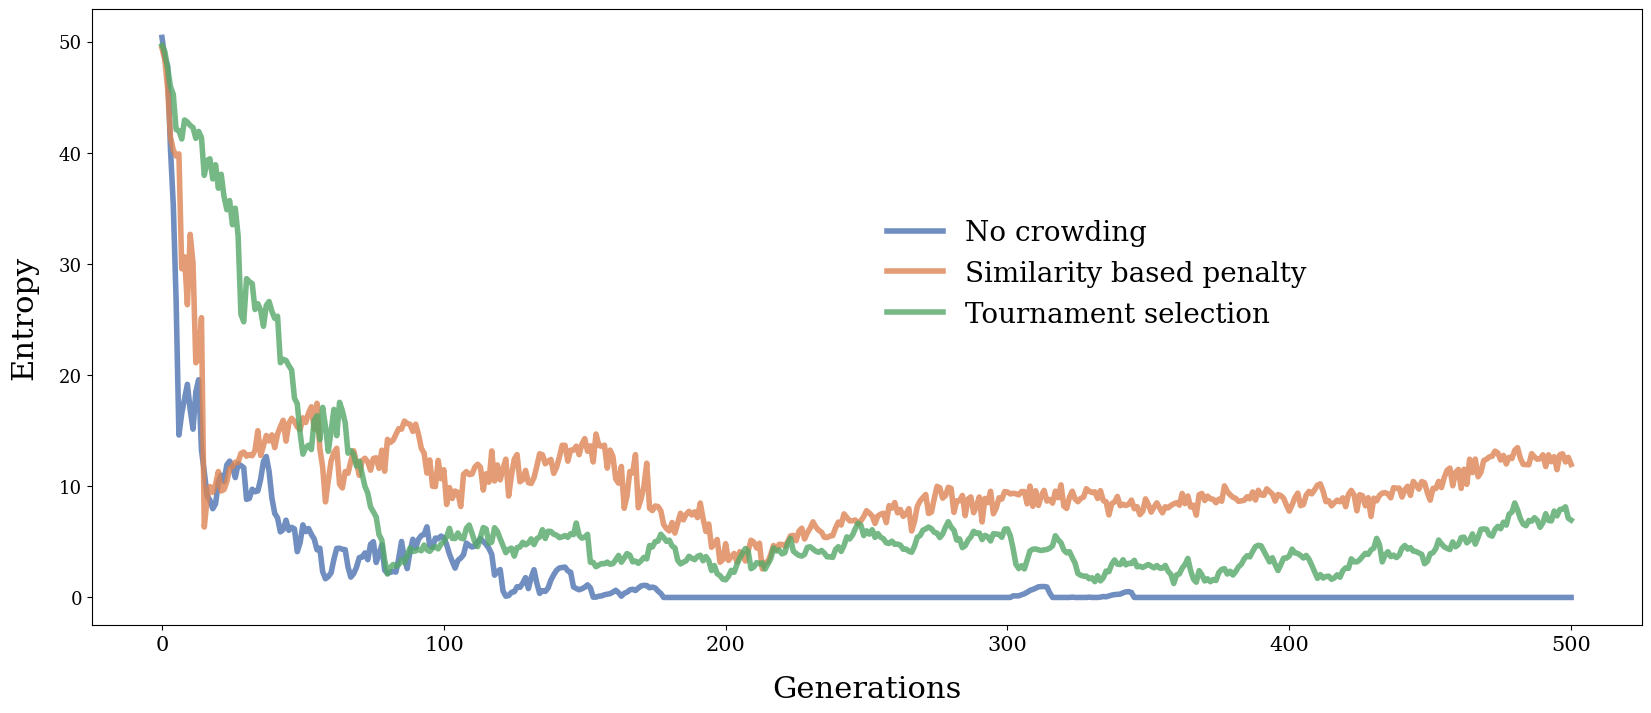

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plots import plot_entropy
entropies = {"No crowding": plain_entropy,
             "Similarity based penalty": sim_crowding_entropy,
             "Tournament selection": tournament_entropy
             }


plot_entropy(entropies)


c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jke00\.conda\envs\bioai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

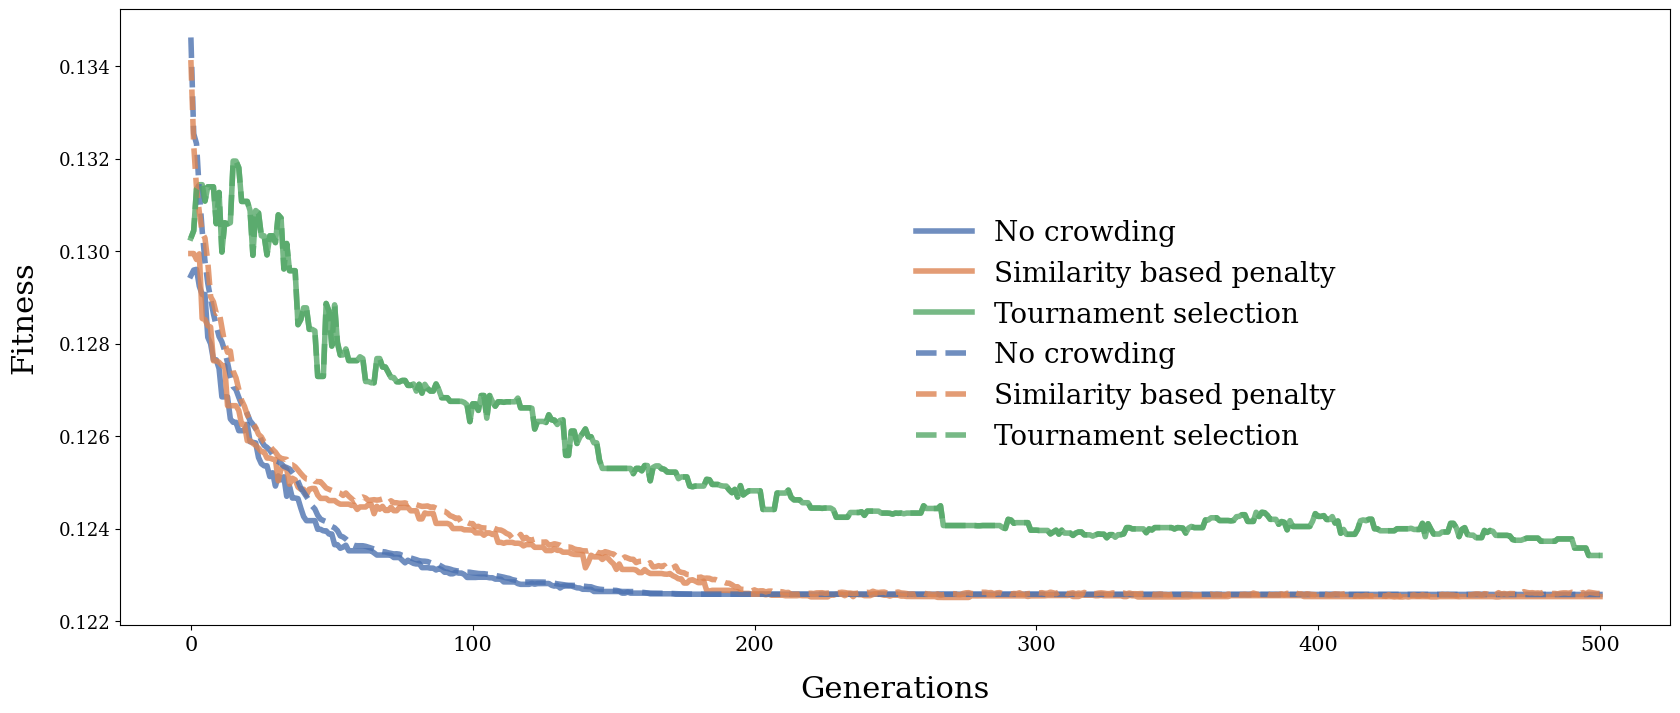

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plots import compare_fitness
best_fitness = {"No crowding": plain_best_fitness,
                "Similarity based penalty": sim_crowding_best_fitness,
                "Tournament selection": tournament_best_fitness
                }

mean_fitness = {"No crowding": plain_mean_fitness,
                "Similarity based penalty": sim_crowding_mean_fitness,
                "Tournament selection": tournament_best_fitness 
                }
compare_fitness(best_fitness, mean_fitness)
